In [1]:
from numpy.random import randn  # random from normal distribution
u = 17   # Mean
s = 4.0  # Standard deviation
random_number = randn()*s + u
random_number

9.95398028738154

In [2]:
import pandas as pd
etruscan = pd.Series(
    name = 'Etruscans',
    data =[
        141, 148, 132, 138, 154, 142, 150, 146, 155, 158, 150, 140,
        147, 148, 144, 150, 149, 145, 149, 158, 143, 141, 144, 144,
        126, 140, 144, 142, 141, 140, 145, 135, 147, 146, 141, 136,
        140, 146, 142, 137, 148, 154, 137, 139, 143, 140, 131, 143,
        141, 149, 148, 135, 148, 152, 143, 144, 141, 143, 147, 146,
        150, 132, 142, 142, 143, 153, 149, 146, 149, 138, 142, 149,
        142, 137, 134, 144, 146, 147, 140, 142, 140, 137, 152, 145
    ]
)

italians = pd.Series(
    name = 'Italians',    
    data = [
        133, 138, 130, 138, 134, 127, 128, 138, 136, 131, 126, 120,
        124, 132, 132, 125, 139, 127, 133, 136, 121, 131, 125, 130,
        129, 125, 136, 131, 132, 127, 129, 132, 116, 134, 125, 128,
        139, 132, 130, 132, 128, 139, 135, 133, 128, 130, 130, 143,
        144, 137, 140, 136, 135, 126, 139, 131, 133, 138, 133, 137,
        140, 130, 137, 134, 130, 148, 135, 138, 135, 138
    ]
)

df = pd.concat([etruscan, italians], axis='columns')
df.to_csv('etruscan.csv', index=False)

<AxesSubplot:ylabel='Frequency'>

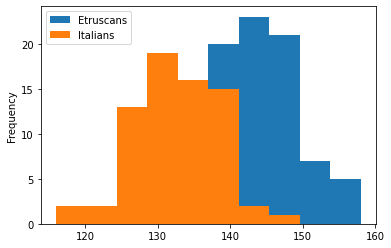

In [3]:
df = pd.read_csv('etruscan.csv')
df.plot.hist()

# Figures

In [4]:
import numpy as np
from numpy.random import randn

In [5]:
mu = 30
sigma = 10
n = 4
samples = 1000
sample_data = sigma*randn(samples,n)+mu
sample_data

array([[48.82494116,  8.45115807, 38.41260605, 19.55612891],
       [24.82635599, 24.52535713, 22.55526526, 25.63891613],
       [40.24190901, 30.42862553, 39.96721905, 22.40107491],
       ...,
       [27.78423419, 45.39763514, 26.86407623, 27.15307876],
       [26.52474803, 36.74312779, 26.82946236, 27.32531087],
       [25.55648873, 23.02162308, 27.94760444, 33.80883367]])

In [6]:
means = np.mean(sample_data, axis=1)
means

array([28.81120855, 24.38647363, 33.25970713, 35.9716298 , 31.83532675,
       26.53843972, 39.31344907, 33.13396665, 29.97252803, 32.73725922,
       31.93119548, 21.24423819, 32.78895643, 32.96048256, 33.51843629,
       34.32375807, 34.25860824, 26.98207496, 27.55281203, 26.28361084,
       34.12021315, 20.85816424, 34.48198071, 30.44186533, 33.28814565,
       24.05713192, 20.0065138 , 25.90537952, 32.02381347, 34.46236625,
       30.90508362, 20.36603531, 26.58451047, 26.96973388, 28.06212221,
       34.24610237, 25.63679952, 27.71976115, 25.95799506, 24.74613938,
       36.62611139, 31.32279127, 28.26093088, 30.040798  , 26.57772546,
       32.39081016, 30.8871924 , 19.51761448, 34.7831355 , 25.92651932,
       27.02611062, 30.38934977, 33.47012742, 17.97839115, 31.96256334,
       25.72835513, 32.57934126, 33.85444662, 27.39299779, 30.86632654,
       33.33062009, 31.38149116, 34.42433678, 30.0740521 , 34.70148892,
       22.07027147, 27.53185172, 32.91396681, 29.89205112, 30.64

In [7]:
import matplotlib.pyplot as plt

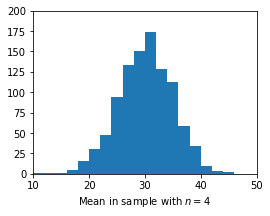

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,3))
plt.hist(
    means,
    bins=np.arange(10,60,2)
)
plt.xlabel('Mean in sample with $n=4$')
plt.xlim(10,50)
plt.ylim(0,200)
plt.savefig(
    'means.pdf',
    bbox_inches='tight'
)

## Confidence intervals of Birch tree data

In [9]:
df = pd.read_csv('../characterization/birch_tree.csv')
df

Flooded  Control
0     1.45     1.70
1     1.19     2.04
2     1.05     1.49
3     1.07     1.91

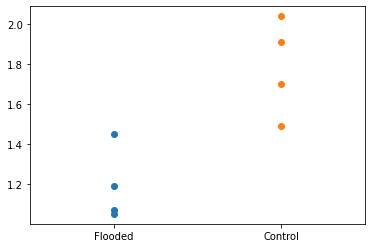

In [10]:
def side_by_side_dot_plot(df):
    ''' Side-by-side dot plot of a Pandas dataframe, df '''
    from numpy import ones
    from matplotlib.pyplot import xticks, xlim
    for idx, (label, series) in enumerate(df.iteritems()):
        plt.plot(ones(len(series))*idx, series, 'o')
    xticks(range(len(df.columns)), df.columns)
    xlim(-0.5, len(df.columns)-0.5)
side_by_side_dot_plot(df)

In [11]:
from scipy import stats
confidence_interval = 0.95  # Confidence interval   (95%)
P = 1-confidence_interval   # Remaining probability ( 5%)
n = len(df)                 # Number of samples
f = n - 1                   # Degrees of fredom
t = stats.t.ppf(1-P/2, f)   # Correction factor
print(f't_{1-P/2}={t}')

t_0.975=3.182446305284263


In [12]:
name = 'Flooded'
y = df[name]
mean = y.mean()
SEy = y.std()/len(y)**0.5
delta_mean = t*SEy
print(f'The lower limit of the 95% confidence interval is {mean-delta_mean}')
print(f'The upper limit of the 95% confidence interval is {mean+delta_mean}')
delta_mean_flooded = delta_mean

The lower limit of the 95% confidence interval is 0.8971688211358841
The upper limit of the 95% confidence interval is 1.4828311788641158


In [13]:
name = 'Control'
y = df[name]
mean = y.mean()
SEy = y.std()/len(y)**0.5
delta_mean = t*SEy
control_low = mean-delta_mean
control_high = mean+delta_mean
print(f'The lower limit of the 95% confidence interval is {mean-delta_mean}')
print(f'The upper limit of the 95% confidence interval is { mean+delta_mean}')
delta_mean_control = delta_mean

The lower limit of the 95% confidence interval is 1.4007929173171005
The upper limit of the 95% confidence interval is 2.1692070826828997


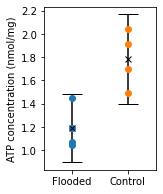

In [14]:
plt.figure(figsize=(2, 3))
plt.errorbar(0, df['Flooded'].mean(), delta_mean_flooded, fmt='kx', capsize=10)
plt.errorbar(1, df['Control'].mean(), delta_mean_control, fmt='kx', capsize=10)
plt.ylabel('ATP concentration (nmol/mg)')
side_by_side_dot_plot(df)
plt.savefig('ATP_confidence_intervals.png', dpi=300, bbox_inches='tight')
plt.savefig('ATP_confidence_intervals.pdf', dpi=300, bbox_inches='tight')